# Генерация значений, распределенных по нормальному закону

In [1]:
%pylab inline
from ipywidgets import interact, interact_manual

Populating the interactive namespace from numpy and matplotlib


In [2]:
# seed(777)
x=normal(size=400)

x

array([ -3.05757414e-01,  -3.23871808e-01,  -1.94463808e+00,
         7.57462535e-01,  -5.62675341e-01,  -7.84823386e-01,
        -8.87000485e-01,   1.62692346e+00,  -5.03749329e-01,
        -2.49760657e+00,   6.48154488e-01,  -1.05386198e-01,
         1.65988612e-01,  -1.04266055e+00,   7.20050846e-01,
        -1.46937363e-01,  -3.71543086e-01,   6.04009557e-01,
         2.75698584e-01,  -5.99886348e-02,  -1.74631451e+00,
         1.78371053e+00,  -1.41183012e+00,   8.94474573e-01,
         1.01727660e+00,  -1.38642056e-01,   7.66878139e-01,
         1.02877004e+00,   1.23663100e+00,   7.55453822e-01,
        -7.85804233e-01,  -2.64362312e+00,  -1.85159791e-01,
        -1.52459004e-02,  -6.76705863e-01,   5.87999337e-01,
        -7.06004562e-01,  -9.93382602e-01,   6.01181570e-01,
        -4.85688130e-01,   2.29511192e+00,  -1.83289669e+00,
        -5.30741843e-01,   1.59134490e+00,   2.54242407e-01,
         2.04782346e+00,  -1.42710394e-01,  -1.41612394e+00,
         1.38546035e+00,

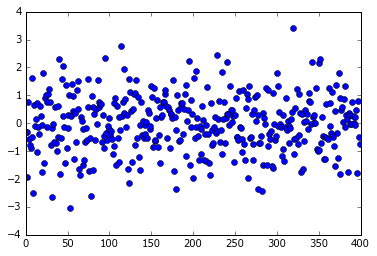

In [3]:
plot(x,'o');

Случайная выборка представляет собой массив положительных и отрицательных чисел в диапазоне от -3 до 3.

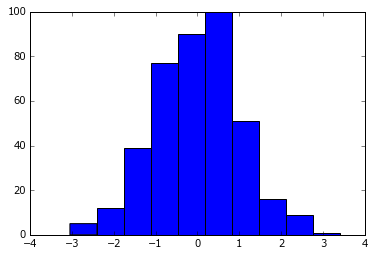

In [4]:
hist(x);

У нормального распределения можно задать два параметра - `loc` (локализацию) и `scale` (шкалу, размах). Локализация сдвигает центр распределения туда, где ожидается среднее значение. Шкала задает размер ожидаемого стандартного отклонения.

По-умолчанию `loc=0.0, scale=1.0`, что дает стандартное нормальное распределение.

Если при z-нормализации мы отнимаем среднее и делим на стандартное отклонение, то при генерации распределения с заданными параметрами мы прибавляем среднее (задаем `loc`) и умножаем на стандартное отклонение (задаем `scale`).

Например, возьмем выборку и посчитаем ее среднее и стандартное отклонение.

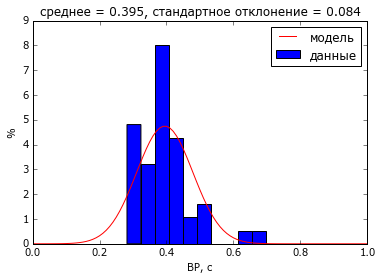

In [5]:
lps=loadtxt('lps')
vv=lps[:,1]
hist(vv, normed=True, label='данные')
#найдем характеристики распределения (предположительно нормального)
M=mean(vv); S=std(vv);
xx=frange(0,1,0.01) #подробные значения абсцисс для гладкой кривой
yy=normpdf(xx, M,S)
plot(xx,yy,'r-', label='модель'); legend(); xlabel('ВР, с'); ylabel('%');
title('среднее = {:.3f}, стандартное отклонение = {:.3f}'.format(M,S));

Наилучшим предсказанием, каким будет следующее значение из этой выборки, является среднее значение (математики говорят: *математическое ожидание*). Однако если нужно предсказать несколько значений (т.е. сгенерить выборку значений, похожих на эмпирические) и все они будут равны среднему, то один параметр мы повторим (среднее будет такое же), а другой нет (стандартное отклонение будет равно 0). Статистическая модель должна давать выборку похожую по всем параметрам на исходную выборку значений.

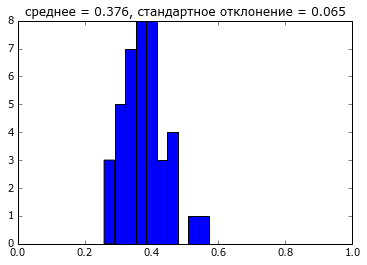

In [6]:
xm = normal(M,S, 40)
hist(xm); xlim(0,1)
xlabel('ВР, с'); ylabel('%');
title('среднее = {:.3f}, стандартное отклонение = {:.3f}'.format(mean(xm),std(xm)));

Повторите выполнение предыдущей ячейки несколько раз и обратите внимание, что параметры созданного выборочного распределения отличаются от заданных в модели. Они похожи, но отличаются. Т.е. варьируют в некоторых пределах.
Такое повторное многократное создание случайных выборок для одной и тоже модели и последующая оценка вариации параметров этих выборок лежит в основе идеи о доверительном интервале.

Также можно сгенерить выборки для других важных статистических распределений.
- random.standard_t - t Стьюдента
- random.chisquare - $\chi ^2$ (хи-квадрат)
- random.exponential - экcпоненциальное
- random.binomial - биномиальное
- random.poisson - Пуассона

См. [Полный список в документации](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.random.html#distributions)

Функции для генерации входят в модуль `random`, поэтому полный путь к ним будет, например, таким: `np.random.normal()`. Однако при использовании команды `%pylab` они становятся доступны без преамбулы. Чтобы убедиться, что переменные ссылаются на один и тот же объект используется оператор `is`.

In [7]:
np.random.exponential is exponential

True

In [8]:
random.exponential is exponential

True

(array([ 1.,  0.,  1.,  1.,  0.,  5.,  3.,  5.,  1.,  3.]),
 array([  9. ,   9.8,  10.6,  11.4,  12.2,  13. ,  13.8,  14.6,  15.4,
         16.2,  17. ]),
 <a list of 10 Patch objects>)

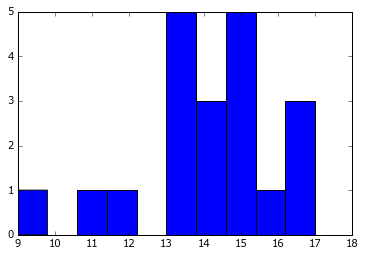

In [10]:
seed(777)
hist(binomial( 20, 0.7, size=20))

Попробуйте сгенерить выборки для всех упомянутых видов распределений. Для некоторых из них необходимо указать параметры (см. справку). При этом обратите внимание на то, как параметры влияют на форму гистограммы.

Напоследок, давайте экспериментально убедимся, что распределение Стьюдента при повышении степеней свободы переходит в нормальное.

Сравним генерацию выборок с моделями, вычисленными по формулам. Функции для работы со статистическими моделями доступны в модуле `scipy.stats`. Для каждого распределения можно получить моменты, PDF (Probability density function, плотность распределения), CDF (Cumulative distribution function), PPF (Percent point function) и др. производные от них функции.

In [ ]:
import scipy.stats as stats

In [ ]:
xx=linspace(-5,5, 100)
mpl.rcParams['font.family']='DejaVu Sans'

@interact(order=(1,6), df=(3,50), iseed=(0,1000))
def _pic(order=2, df=3, iseed=None):
         
    n = 10**order
    seed(iseed)

    fig, (ax1,ax2) = subplots(1,2, figsize=(12,5))

    ax1.hist(standard_normal(n), xx, alpha=0.8, color='g', histtype='step', label='normal');
    ax1.hist(standard_t(df, n), xx, alpha=0.8, color='r', histtype='step', label='t(df={})'.format(df));
    ax1.legend();
    ax1.set_title('Выборки по {} значений'.format(n))

    ax2.plot(xx, stats.norm.pdf(xx), 'g-', lw=2, alpha=0.8, label='normal')
    ax2.plot(xx, stats.t.pdf(xx, df), 'r-', lw=2, alpha=0.8, label='t(df={})'.format(df))
    legend();
    title('Теоретические распределения (PDF)')


Определите, 
- при каком значении степени свободы (df) распределения перестают отличаться;
- при каких размерах выборки экспериментальные данные начинают соответствовать теоретическим.
